# IBM HR Attrition: Exploraty Data Analysis Project

**Purpose (from Kaggle)** \
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load in Data

Load in the data and do some initial exploration

In [2]:
df = pd.read_csv('datasets_1067_1925_WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
pd.options.display.max_columns = 35 #35 columns in data set
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [182]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Initial Thoughts

1. Clean BusinessTravel (string "Travel_" from string)
2. Drop EmployeeNumber, EmployeeCount, StandardHours
3. Use only one rate? (hourly, daily, monthly)
4. Explore unique values of qualitative columns

#### 1) Clean BusinessTravel

In [6]:
df['BusinessTravel'] = df['BusinessTravel'].apply(lambda x: x.replace("Travel_", ""))

In [7]:
df['BusinessTravel'].unique()

array(['Rarely', 'Frequently', 'Non-Travel'], dtype=object)

#### 2) Drop EmployeeNumber, EmployeeCount, StandardHours

In [8]:
df.drop(['EmployeeNumber', 'EmployeeCount','StandardHours'],inplace=True,axis=1)

In [9]:
any(col in ['EmployeeNumber', 'EmployeeCount','StandardHours'] for col in df.columns.tolist())

False

#### 3) Use only one rate?

placeholder

#### 4) Explore unique values of qualitative columns

In [10]:
print("Department:", df['Department'].unique())
print("Education:", df['EducationField'].unique())
print("Job:", df['JobRole'].unique())
print("MaritalStatus:", df['MaritalStatus'].unique())

Department: ['Sales' 'Research & Development' 'Human Resources']
Education: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Job: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']


## Investigate Distributions

#### Look at target balance

Text(0.5, 1.0, 'Employee Attrition')

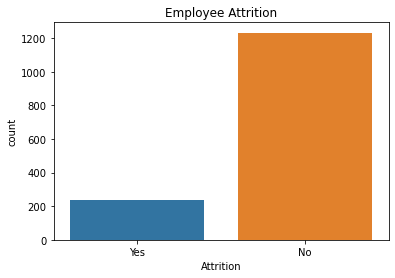

In [11]:
sns.countplot(df['Attrition'])
plt.title("Employee Attrition")

Here we can see we are dealing with an imbalanced data set.

#### Check out KDE plots

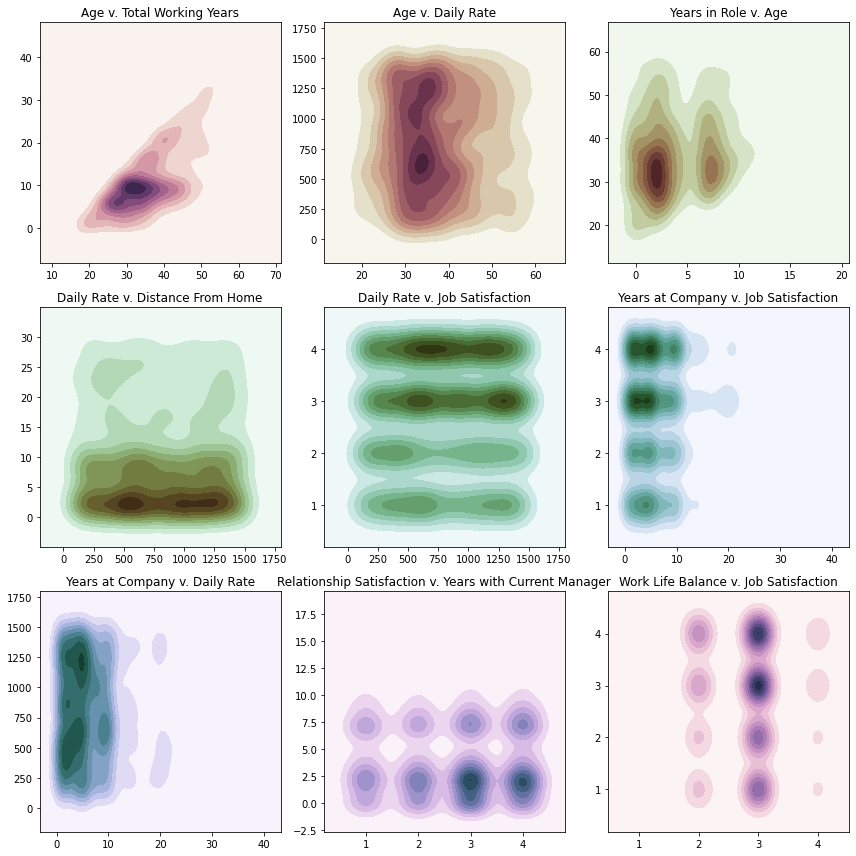

In [14]:
f, axes = plt.subplots(3, 3, figsize=(12,12), sharex=False, sharey=False)

# define color map
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# plot
x = df['Age'].values
y = df['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set(title='Age v. Total Working Years')

cmap = sns.cubehelix_palette(start=0.33333, light=1, as_cmap=True)
x = df['Age'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set(title='Age v. Daily Rate')

cmap = sns.cubehelix_palette(start=0.66667, light=1, as_cmap=True)
x = df['YearsInCurrentRole'].values
y = df['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set(title='Years in Role v. Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
x = df['DailyRate'].values
y = df['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set(title='Daily Rate v. Distance From Home')

cmap = sns.cubehelix_palette(start=1.33333, light=1, as_cmap=True)
x = df['DailyRate'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set(title='Daily Rate v. Job Satisfaction')

cmap = sns.cubehelix_palette(start=1.66667, light=1, as_cmap=True)
x = df['YearsAtCompany'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set(title='Years at Company v. Job Satisfaction')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
x = df['YearsAtCompany'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,0])
axes[2,0].set(title='Years at Company v. Daily Rate')

cmap = sns.cubehelix_palette(start=2.33333, light=1, as_cmap=True)
x = df['RelationshipSatisfaction'].values
y = df['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,1])
axes[2,1].set(title='Relationship Satisfaction v. Years with Current Manager')

cmap = sns.cubehelix_palette(start=2.66667, light=1, as_cmap=True)
x = df['WorkLifeBalance'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,2])
axes[2,2].set(title='Work Life Balance v. Job Satisfaction')

f.tight_layout()

## Deep Dive Analyses

I will be exploring the data in the order listed below. They are in order of my hypothesized affect on attrition.

1. Income
2. Working Environment
3. Education
4. Gender

### 1. Exploring Income
Does income play a vital role in attrition and/or job performance?

**Questions to Explore:**
1. Do the employees that attrit have significantly lower incomes than those that stay?
    - How is that affected by department?
        - How does the average monthly income vary by department? 
        - Are there significant differences in those that attrit?
2. Do employees with higher job satisfaction get paid more?
    - Are there significant differences between income level and job satisfaction?
3. Are employees that receive smaller raises more likely to attrit?
    - Do employees that leave receive smaller raises (on average)?
    - Are raises given proportionately by department?
    - Are raises given in-line with job performance?

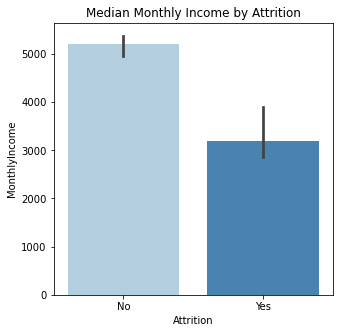

In [389]:
plt.figure(figsize=(5,5))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df, palette="Blues", order={"No","Yes"}, estimator=np.median)
plt.title("Median Monthly Income by Attrition")
plt.show()

**Takeaway:** The median monthly income of those employees that leave the company is lower than those who stay.

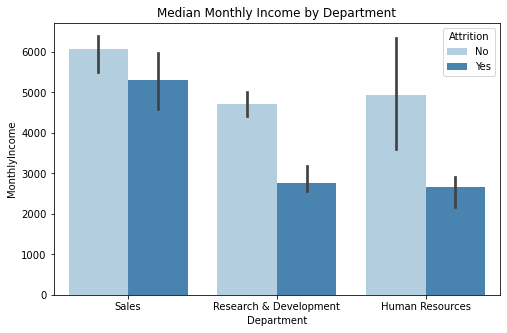

In [390]:
plt.figure(figsize=(8,5))
sns.barplot(x='Department',y='MonthlyIncome',data=df, hue='Attrition', hue_order={"No", "Yes"}, palette="Blues", estimator=np.median)
plt.title("Median Monthly Income by Department")
plt.show()

**Takeaway:** The median monthly income is lower among employees that leave the company regardleses of department. The biggest discrepancy in monthly income between employees that stay and employees that leave is in the HR department.

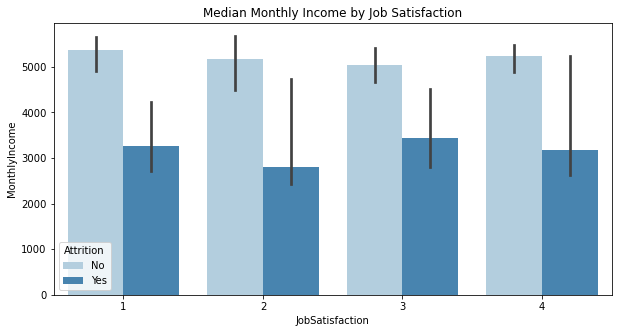

In [391]:
plt.figure(figsize=(10,5))
sns.barplot(x='JobSatisfaction',y='MonthlyIncome',data=df, hue='Attrition', hue_order={"No", "Yes"}, palette="Blues", estimator=np.median)
plt.title("Median Monthly Income by Job Satisfaction")
plt.show()

**Takeaway:** Again, monthly income is lower for the employees who left the company than for those who stayed regardless of job satisfaction.

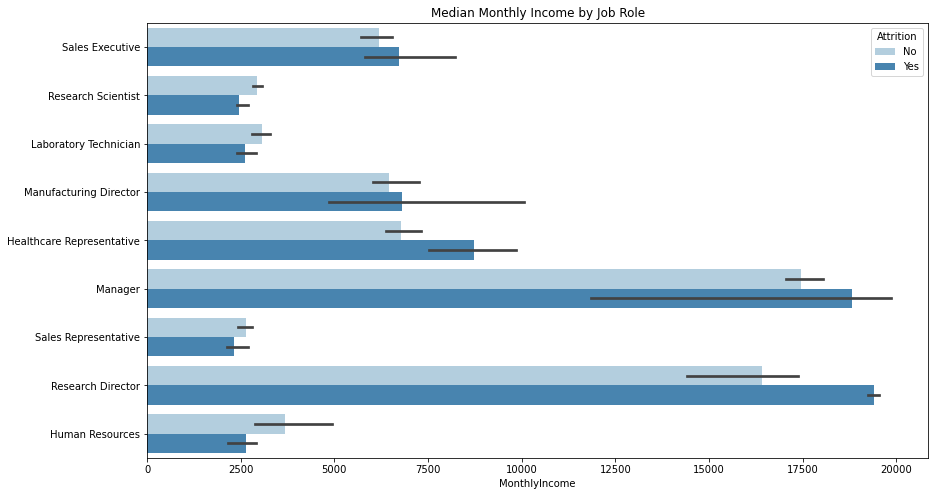

In [392]:
plt.figure(figsize=(14,8))
sns.barplot(y='JobRole',x='MonthlyIncome',data=df, hue='Attrition', hue_order={"No", "Yes"}, palette="Blues", estimator=np.median)
plt.title("Median Monthly Income by Job Role")
plt.ylabel(None)
plt.show()

**Takeaway:** Monthly income doesn't paint quite as clear a picture of attrition when broken down by job role. Income seems uneffective in retaining employees in senior leadership roles (Sales Exec, Manufacturing Director, Research Director). Another interesting observation is that Healthcare Reps with a higher income tend to leave the company.  

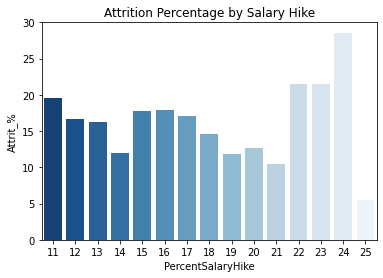

In [393]:
df_pivot = df.pivot_table(values='Age', index='PercentSalaryHike', columns='Attrition', aggfunc='count')
df_pivot['Attrit_%'] = df_pivot['Yes']/(df_pivot['No']+df_pivot['Yes'])*100
df_pivot.reset_index(inplace=True)
sns.barplot(data=df_pivot, x='PercentSalaryHike', y='Attrit_%', palette='Blues_r')
plt.title("Attrition Percentage by Salary Hike")
plt.show()

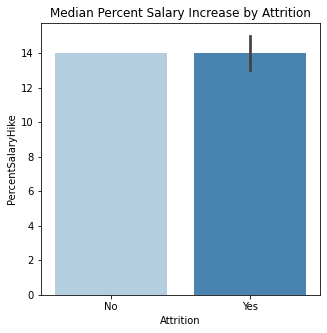

In [395]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x='Attrition', y='PercentSalaryHike', palette='Blues', order={"No", "Yes"}, estimator=np.median)
plt.title("Median Percent Salary Increase by Attrition")
plt.show()

**Takeaway:** There is no discernable relationship between attrtion percentage and the size of the salary hike an employee received. 

In [334]:
cut_labels_5 = ['<14', '14-16', '17-19', '20-22', '>22']
cut_bins = [0, 13, 16, 19, 22, 25]
df['SalaryRaiseBin'] = pd.cut(df['PercentSalaryHike'], bins=cut_bins, labels=cut_labels_5)

<AxesSubplot:xlabel='SalaryRaiseBin'>

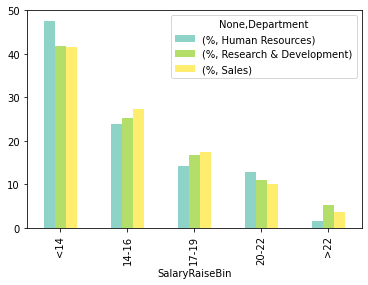

In [335]:
grouped_data = df.groupby(['Department', 'SalaryRaiseBin']).agg({'Age': 'count'})
grouped_data["%"] = grouped_data.groupby(level=0).apply(lambda x:  100*x / x.sum())
grouped_data.drop("Age", axis=1).unstack(level=0).plot(kind='bar', colormap='Set3')

**Takeaway:** Salary hikes are mostly proportional across departments. However, at the extremes, HR receives more "lower" salary hikes and less "higher" salary hikes.

In [231]:
grouped_data2 = df.groupby(['PerformanceRating', 'SalaryRaiseBin']).agg({'Age': 'count'})
grouped_data2["%"] = grouped_data2.groupby(level=0).apply(lambda x:  100*x / x.sum())
grouped_data2.drop("Age", axis=1)

%
PerformanceRating SalaryRaiseBin           
3                 <13             49.598071
                  14-16           30.546624
                  17-19           19.855305
                  20-22            0.000000
                  >23              0.000000
4                 <13              0.000000
                  14-16            0.000000
                  17-19            0.000000
                  20-22           70.353982
                  >23             29.646018

**Takeaway:** Salary hikes were based on Performance Rating. Therefore, we can say that employees did not leave because they were rated a "good" employee but didn't receive a fair raise. However, we cannot say that they did not leave because they felt entitled to a better performance rating.

### 2. Exploring Work Environment
How does the work environment of an employee affect their likelihood to leave the company and their job performance?

**Questions to Explore:**
1. How does job satisfaction vary by Department? Job Role?
2. Do employees with lower job satisfaction leave the company more?
    - How is that affected by department? by job role?
3. How does environment satisfaction affect employee job satisfaction? 
    - How does this affct attrition? Job Performance?
4. How does the relationship with the manager affect an employee?
    - Do employees with worse manager relationships leave the company more?
    - Do they perform worse?
5. How does overtime affect an employee?
    - Do they have worse job satisfaction?
    - Do they leave the company more?
    - Does it affect job performance?
6. How does career length affect job satisfaction?
    - Are longer tenured employees more likely to be happy?

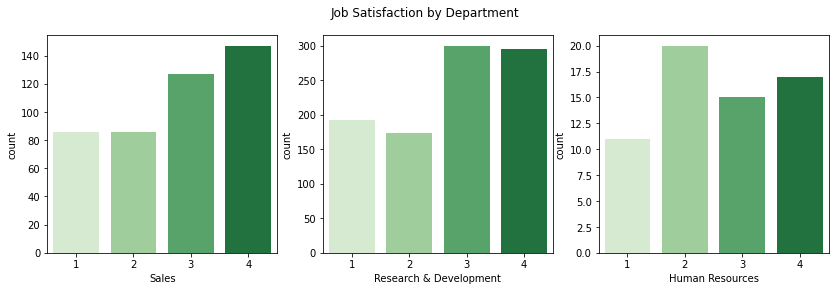

In [433]:
f, axes = plt.subplots(ncols=3, figsize=(14,4), sharex=False, sharey=False)

sns.countplot(df[df['Department'] == 'Sales']['JobSatisfaction'], palette="Greens", ax=axes[0])
axes[0].set(xlabel='Sales')
sns.countplot(df[df['Department'] == 'Research & Development']['JobSatisfaction'], palette="Greens", ax=axes[1])
axes[1].set(xlabel='Research & Development')
sns.countplot(df[df['Department'] == 'Human Resources']['JobSatisfaction'], palette="Greens", ax=axes[2])
axes[2].set(xlabel='Human Resources')

f.suptitle("Job Satisfaction by Department")
plt.show()

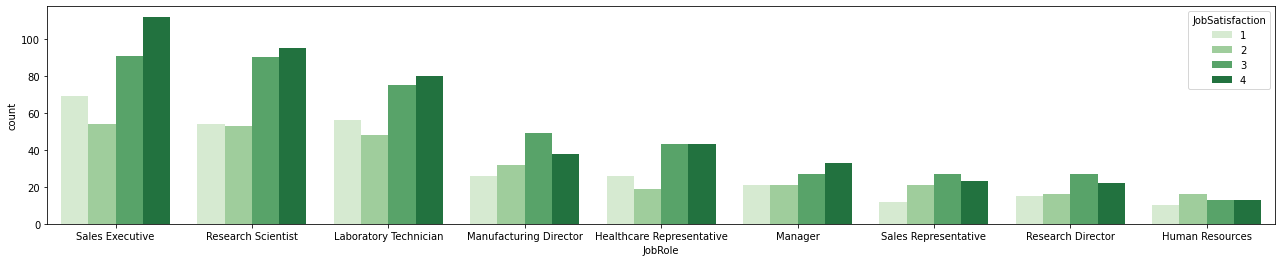

In [420]:
plt.figure(figsize=(22,4))
sns.countplot(df['JobRole'],hue=df['JobSatisfaction'], palette="Greens")
plt.show()

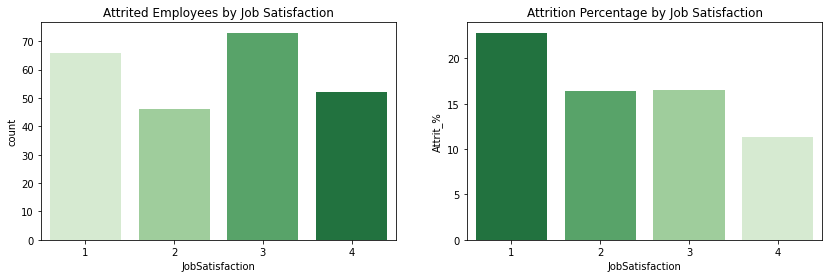

In [438]:
f, axes = plt.subplots(ncols=2, figsize=(14,4), sharex=False, sharey=False)
sns.countplot(df[df['Attrition'] == 'Yes']['JobSatisfaction'], palette='Greens', ax=axes[0])
axes[0].set(title="Attrited Employees by Job Satisfaction")

df_pivot = df.pivot_table(values='Age', index='JobSatisfaction', columns='Attrition', aggfunc='count')
df_pivot['Attrit_%'] = df_pivot['Yes']/(df_pivot['No']+df_pivot['Yes'])*100
df_pivot.reset_index(inplace=True)
sns.barplot(data=df_pivot, x='JobSatisfaction', y='Attrit_%', palette='Greens_r', ax=axes[1])
axes[1].set(title="Attrition Percentage by Job Satisfaction")

plt.show()

**Takeaway:** Employees with the lowest job satisfaction are most likely to leave the company. However, more employees who rated job satisfaction as "High" left the company.

### 3. Exploring Education
How does education level affect attrition and performance?

**Questions to Explore:**
1. How does education vary by Education Field? Department? Job Role?
2. How does attrition vary by Education and Education Field?
3. Is there a noticeable pattern in level of education and likelihood to leave the company?
    - How is that affected by department? by job role?
    - How is this affected by education field?
4. Do younger employees have more education than older employees?
    - Is there a generational difference in education obtained?
5. Does job performance vary proportionally to education level?
    - Do better employees tend to have more education?
    - Do better employees have more education or more years of experience?

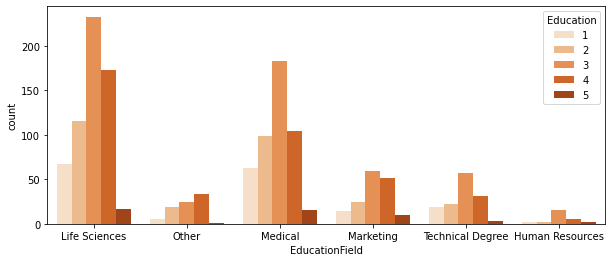

In [318]:
plt.figure(figsize=(10,4))
sns.countplot(df['EducationField'],hue=df['Education'], palette="Oranges")
plt.show()

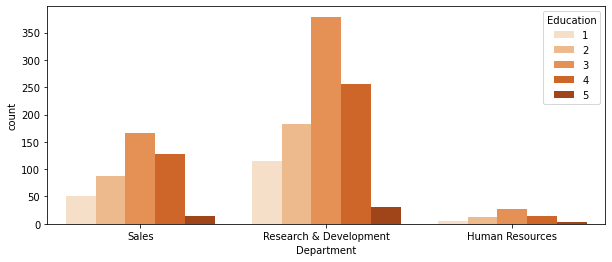

In [321]:
plt.figure(figsize=(10,4))
sns.countplot(df['Department'],hue=df['Education'], palette="Oranges")
plt.show()

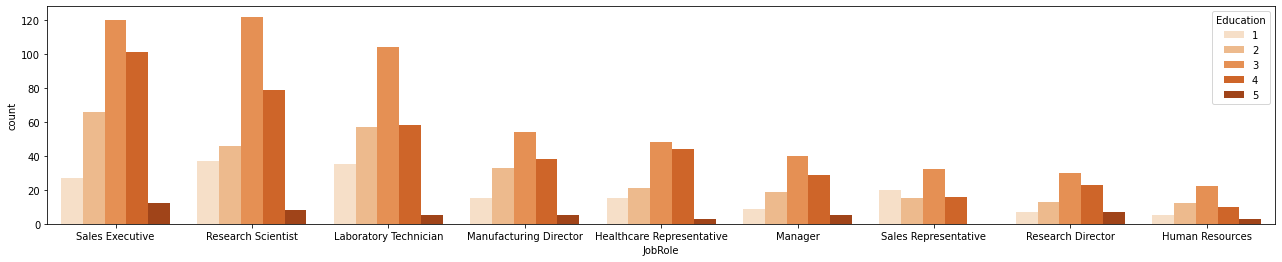

In [421]:
plt.figure(figsize=(22,4))
sns.countplot(df['JobRole'],hue=df['Education'], palette="Oranges")
plt.show()

**Takeaway:** Most fields, departments, and jobs have employees of education level 3 or 4 (Bachelor or Master degree) with very few having a Doctorate. Therefore, we would expect the majority of people that leave the company to also have education level 3 or 4.

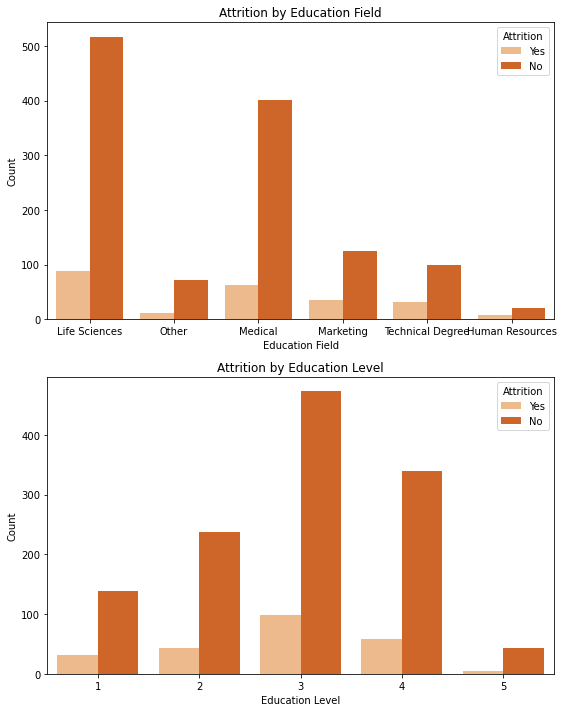

In [324]:
figure, axes = plt.subplots(nrows=2, figsize=(8,10))
# plt.figure(figsize=(12,6))
sns.countplot(df['EducationField'],hue=df['Attrition'], ax=axes[0], palette="Oranges")
axes[0].set_title('Attrition by Education Field')
axes[0].set(xlabel='Education Field', ylabel='Count')
sns.countplot(df['Education'],hue=df['Attrition'],ax=axes[1], palette="Oranges")
axes[1].set_title('Attrition by Education Level')
axes[1].set(xlabel='Education Level', ylabel='Count')

plt.tight_layout()

**Takeaway:** Here I am looking to make sure attrition is proportional to the counts by Education Field and Education Level which it is, so no red flags.

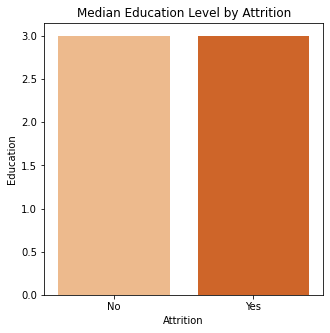

In [325]:
plt.figure(figsize=(5,5))
sns.barplot(x='Attrition',y='Education',data=df, palette="Oranges", order={"No","Yes"}, estimator=np.median)
plt.title("Median Education Level by Attrition")
plt.show()

**Takeaway:** Median education level is equivalent between those that leave the company and those that stay.

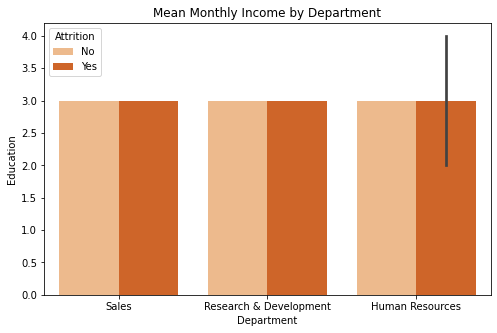

In [289]:
plt.figure(figsize=(8,5))
sns.barplot(x='Department', y='Education',data=df, hue='Attrition', hue_order={"No", "Yes"}, palette="Oranges", estimator=np.median)
plt.title("Mean Monthly Income by Department")
plt.show()

**Takeaway:** Median education level is equivalent by department amoung those who leave or stay.

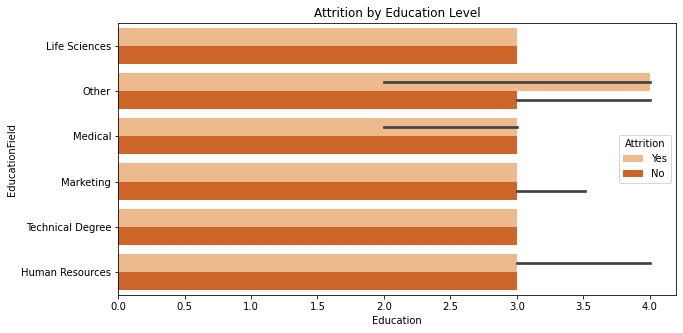

In [306]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Education', y='EducationField',hue='Attrition', palette="Oranges", estimator=np.median)
plt.title('Attrition by Education Level')
plt.show()

**Takeaway:** There is mostly no difference in education by job role between those who leave or stay. However, education level does vary between those that leave and stay for three job roles: Manufacturing Directors (higher among those that leave), Healthcare Representatives (lower), and Research Directors (higher).

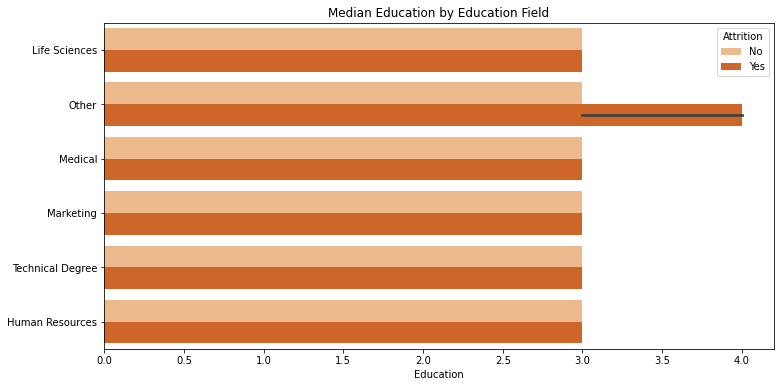

In [326]:
plt.figure(figsize=(12,6))
sns.barplot(y='EducationField',x='Education',data=df, hue='Attrition', hue_order={"No", "Yes"}, palette="Oranges", estimator=np.median, ci=50)
plt.title("Median Education by Education Field")
plt.ylabel(None)
plt.show()

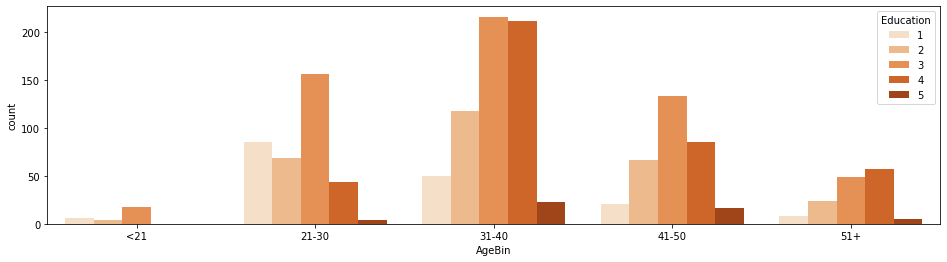

In [374]:
cut_labels = ['<21', '21-30', '31-40', '41-50', '51+']
cut_bins = [0, 20, 30, 40, 50, 60]
df['AgeBin'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels)

plt.figure(figsize=(16,4))
sns.countplot(df['AgeBin'],hue=df['Education'], palette="Oranges", )
plt.show()

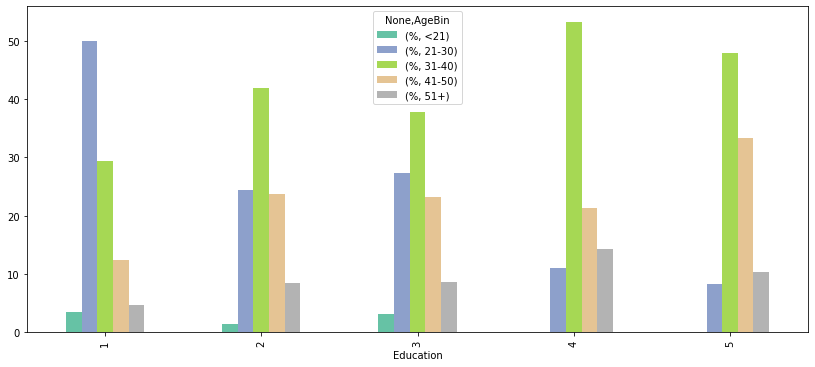

In [381]:
age_education = df.groupby(['Education', 'AgeBin']).agg({'Age': 'count'})
age_education["%"] = age_education.groupby(level=0).apply(lambda x:  100*x / x.sum())
age_education.drop("Age", axis=1).unstack().plot(kind='bar', figsize=(14,6), cmap='Set2')
plt.show()

**Takeaway:** More than 50% of "Below College" education is made up of employees younger than 30. About 70% of employees with Bachelor's degrees (level 3) are between 21 and 40 years old. Higher education employees (level 4 and 5) is primarily made up of 31-40 year olds followed by 41-50 year olds. **The highest levels of education are more prevalent in older employees, but Bachelor's degrees are predominanlty owned by younger employees (21-40).**

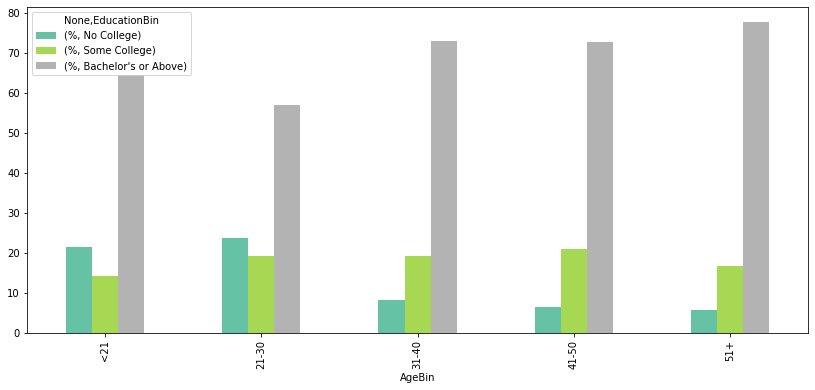

In [384]:
cut_labels = ['No College', 'Some College', 'Bachelor\'s or Above']
cut_bins = [0, 1, 2, 5]
df['EducationBin'] = pd.cut(df['Education'], bins=cut_bins, labels=cut_labels)

age_education2 = df.groupby(['AgeBin', 'EducationBin']).agg({'Age': 'count'})
age_education2["%"] = age_education2.groupby(level=0).apply(lambda x:  100*x / x.sum())
age_education2.drop("Age", axis=1).unstack().plot(kind='bar', figsize=(14,6), cmap='Set2')
plt.show()

**Takeaway:** The proportion of employees obtaining a Bachelor's degree or above is roughly equivalent by age groups. An exception could be called out for the 21-30 age group.

## Investigate Correlations

<AxesSubplot:>

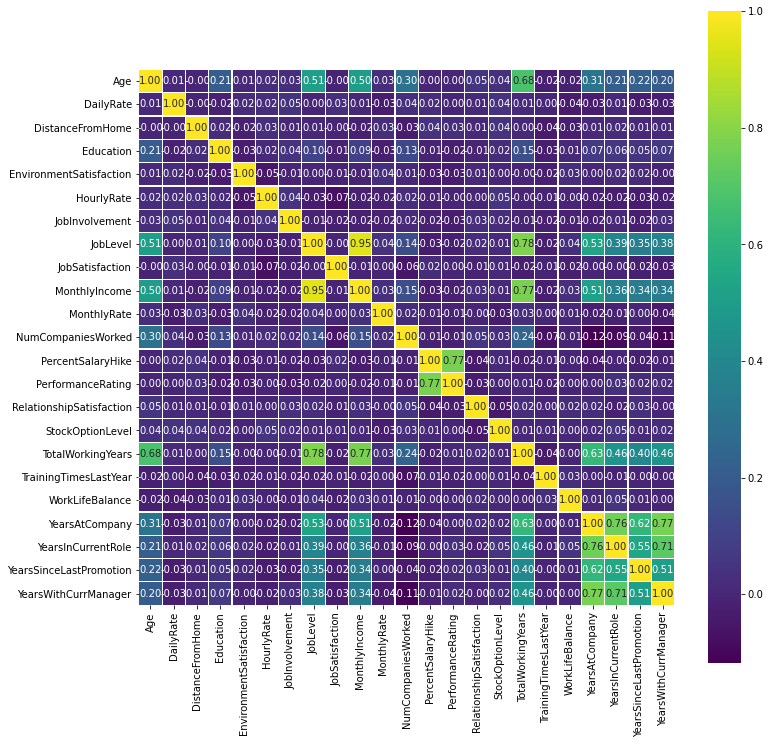

In [61]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), square=True, linewidths=0.2,cmap='viridis', fmt='.2f', annot=True, annot_kws={'size': 10})